<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/March/03.15/SEN/pretrained_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau   # Learning Rate 조절하는 도구

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense    # feature map 전체의 평균을 가져옴(부분이 아닌 전역 평균 pooling)

from sklearn.model_selection import train_test_split

import random
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = InceptionV3(weights = 'imagenet',
					include_top = True,
					input_shape = (299, 299, 3))

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/transfer/*/*')
files

['/content/drive/MyDrive/my_data/transfer/white fox/iceland-gf58d1d149_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/white-gf4725b795_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/fox-gf7c254e8b_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/arctic-fox-gdee56f507_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/white-g3c0174806_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/arctic-fox-g3cf68e368_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/fox-g2ca1f7cc8_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/fox-ga363b0b29_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/arctic-fox-gea191b15f_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/white fox/white-g93ee3dfb0_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/fox/fox-g2fd088753_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/fox/fox-g74551d4ae_1920.jpg',
 '/content/drive/MyDrive/my_data/transfer/fox

In [ ]:
img = image.load_img(files[0], color_mode = 'rgb', target_size = (299, 299) )
img = image.img_to_array(img)
img = img.reshape((-1, 299, 299, 3))

In [ ]:
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)

35363/35363 [==============================] - 0s 0us/step
[('n02120079', 'Arctic_fox', 0.95376015), ('n02114548', 'white_wolf', 0.004659531), ('n02111889', 'Samoyed', 0.0014455335)]


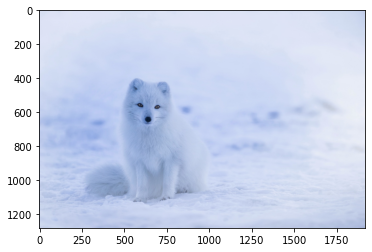

[('n02120079', 'Arctic_fox', 0.91563874), ('n02134084', 'ice_bear', 0.008703234), ('n02114548', 'white_wolf', 0.0077350135)]


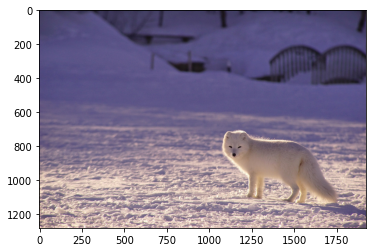

[('n02120079', 'Arctic_fox', 0.95915085), ('n02111889', 'Samoyed', 0.0060110055), ('n02134084', 'ice_bear', 0.002014665)]


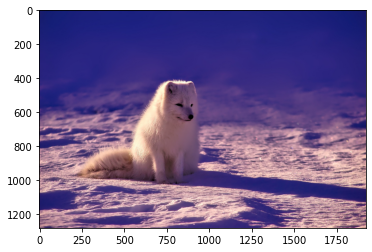

[('n02120079', 'Arctic_fox', 0.2941447), ('n02114548', 'white_wolf', 0.13686796), ('n02119789', 'kit_fox', 0.12212643)]


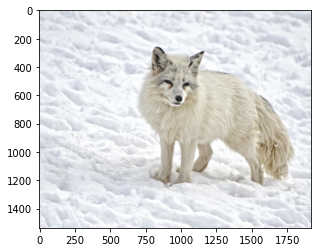

[('n02120079', 'Arctic_fox', 0.7557722), ('n02114548', 'white_wolf', 0.044026513), ('n02111889', 'Samoyed', 0.023266748)]


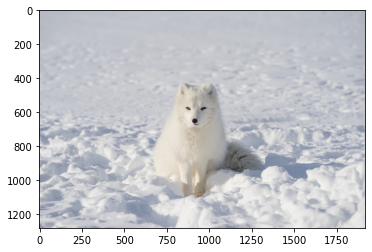

[('n02120079', 'Arctic_fox', 0.74692684), ('n02114548', 'white_wolf', 0.11129347), ('n02114367', 'timber_wolf', 0.003573552)]


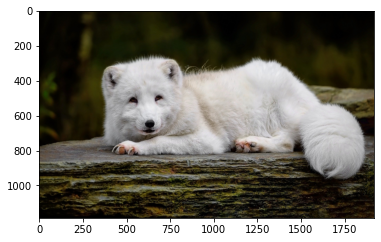

[('n02120079', 'Arctic_fox', 0.95951223), ('n02111889', 'Samoyed', 0.006588175), ('n02114548', 'white_wolf', 0.0036171987)]


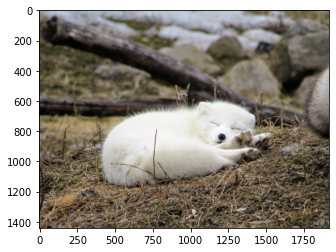

[('n02120079', 'Arctic_fox', 0.8834707), ('n02114548', 'white_wolf', 0.049234185), ('n02111889', 'Samoyed', 0.002820741)]


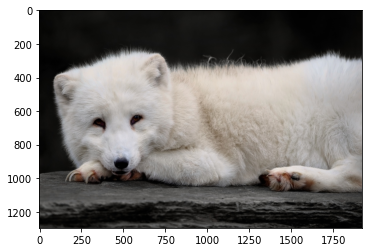

[('n02120079', 'Arctic_fox', 0.8122751), ('n02114548', 'white_wolf', 0.064669155), ('n02111889', 'Samoyed', 0.0035887053)]


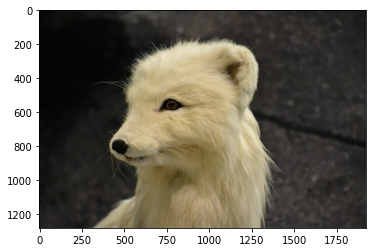

[('n02120079', 'Arctic_fox', 0.9272714), ('n02111889', 'Samoyed', 0.0029840951), ('n02441942', 'weasel', 0.0011011452)]


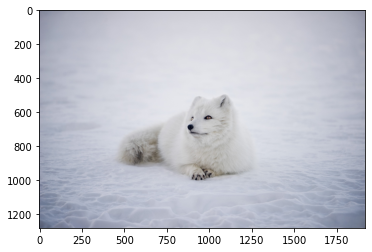

[('n02120079', 'Arctic_fox', 0.95915085), ('n02111889', 'Samoyed', 0.0060110055), ('n02134084', 'ice_bear', 0.002014665)]


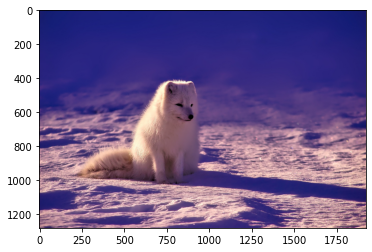

[('n02119022', 'red_fox', 0.7388524), ('n02119789', 'kit_fox', 0.102085434), ('n02120505', 'grey_fox', 0.03587208)]


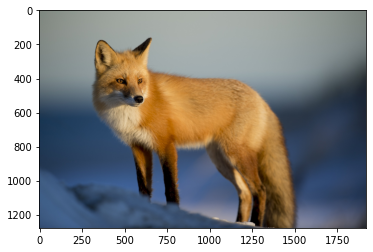

[('n02119022', 'red_fox', 0.7374304), ('n02119789', 'kit_fox', 0.16276383), ('n02120505', 'grey_fox', 0.0033504874)]


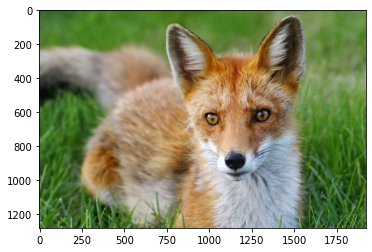

[('n02119022', 'red_fox', 0.5339292), ('n02119789', 'kit_fox', 0.29642347), ('n02120505', 'grey_fox', 0.05730164)]


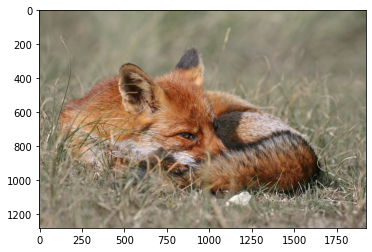

[('n02119022', 'red_fox', 0.6392002), ('n02119789', 'kit_fox', 0.096427105), ('n02115641', 'dingo', 0.07413869)]


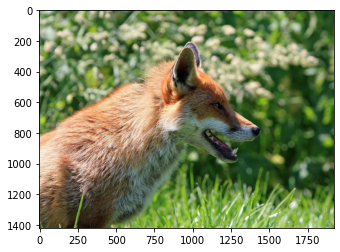

[('n02119022', 'red_fox', 0.90373504), ('n02119789', 'kit_fox', 0.07099531), ('n04023962', 'punching_bag', 0.00082479947)]


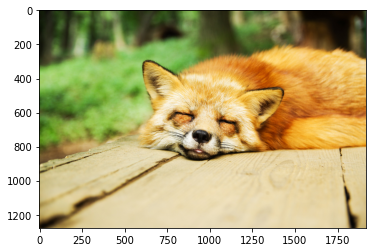

[('n02119789', 'kit_fox', 0.7714552), ('n02119022', 'red_fox', 0.16427658), ('n02120505', 'grey_fox', 0.004829492)]


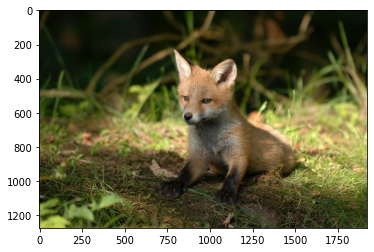

[('n02119022', 'red_fox', 0.6922213), ('n02114855', 'coyote', 0.06207082), ('n02120505', 'grey_fox', 0.04564038)]


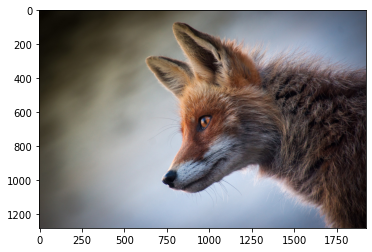

[('n02119022', 'red_fox', 0.7463589), ('n02328150', 'Angora', 0.024870444), ('n02326432', 'hare', 0.022080544)]


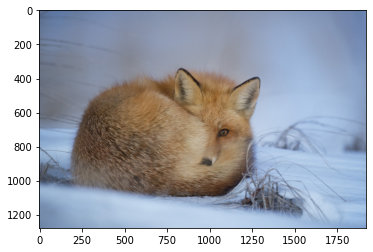

[('n02119789', 'kit_fox', 0.6880726), ('n02119022', 'red_fox', 0.25811216), ('n02120505', 'grey_fox', 0.0029654375)]


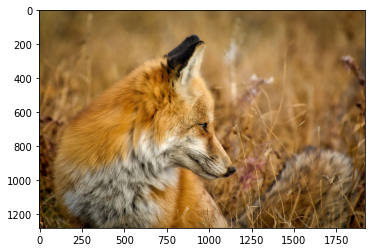

[('n02342885', 'hamster', 0.9160839), ('n02361337', 'marmot', 0.0053525455), ('n03976657', 'pole', 0.0018136688)]


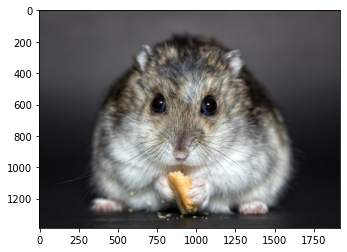

[('n02342885', 'hamster', 0.884232), ('n03794056', 'mousetrap', 0.005494587), ('n07714990', 'broccoli', 0.0028295056)]


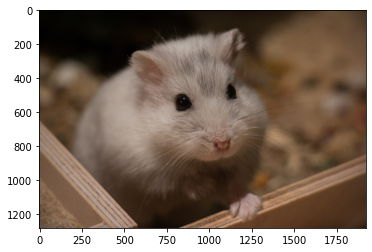

[('n07714990', 'broccoli', 0.4632618), ('n02342885', 'hamster', 0.4391746), ('n02364673', 'guinea_pig', 0.00097080687)]


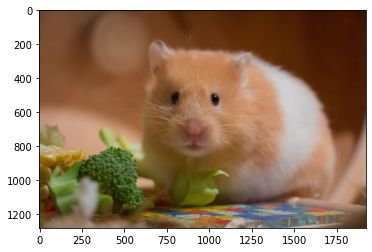

[('n02342885', 'hamster', 0.9006167), ('n07714990', 'broccoli', 0.0024225162), ('n02825657', 'bell_cote', 0.0011520002)]


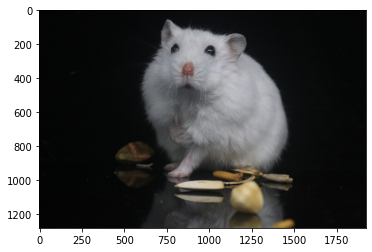

[('n02342885', 'hamster', 0.28940445), ('n01883070', 'wombat', 0.053249806), ('n03935335', 'piggy_bank', 0.033794466)]


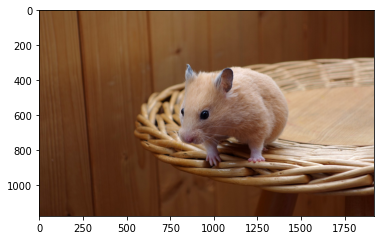

[('n02137549', 'mongoose', 0.12029628), ('n02361337', 'marmot', 0.09420046), ('n02490219', 'marmoset', 0.082206525)]


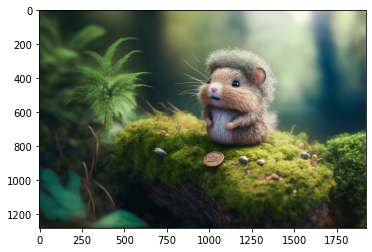

[('n07930864', 'cup', 0.41770044), ('n02342885', 'hamster', 0.16249666), ('n04398044', 'teapot', 0.11971342)]


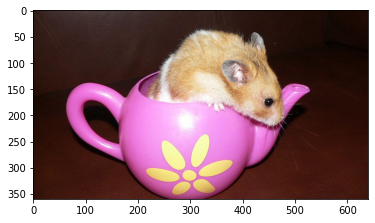

[('n02342885', 'hamster', 0.9004354), ('n02363005', 'beaver', 0.012136828), ('n02361337', 'marmot', 0.006549082)]


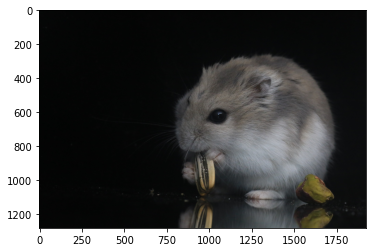

[('n02342885', 'hamster', 0.85656786), ('n07714990', 'broccoli', 0.0026704154), ('n03794056', 'mousetrap', 0.0024636225)]


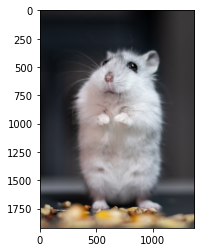

[('n01833805', 'hummingbird', 0.46571615), ('n02441942', 'weasel', 0.053029016), ('n02494079', 'squirrel_monkey', 0.039447393)]


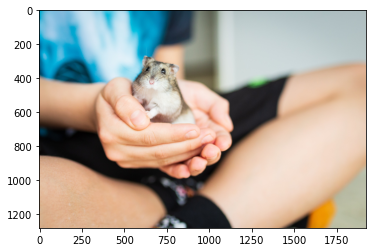

In [ ]:
features = model.predict(images)
predictions = decode_predictions(features, top = 3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()